## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p
import contractions
import string
import regex as re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

## Functions

In [68]:
def preprocess_tweet(row):
    text=row['tweet']
    text=p.clean(text)
    return text

def lowercase(text):
    text = text.lower()
    return text

# Expand the contractions here
def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    text=re.sub('[0-9]+', '',text)
    return text

def stopwords_removal(text):
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Function for evaluating
def model_Evaluate(model):
    # Predict values for Test dataset
    ypred_classes = model.predict_classes(padded_xtest)
    ypred_classes = ypred_classes[:, 0]
    # Print the evaluation metrics for the dataset.
    print("Accuracy is {}".format(accuracy_score(ytest, ypred_classes)))
    print("F1 Score is {}".format(f1_score(ytest, ypred_classes)))
    print(classification_report(ytest, ypred_classes))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(ytest, ypred_classes)
    print(cf_matrix)

## Reading data

In [3]:
df = pd.read_csv("TweetsSentiment140.csv",header=None, encoding= "latin-1")
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

In [5]:
df_1=df[:10000]
df_1.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df_2=df[1590000:]
df_2.head()

,0,1,2,3,4,5
1590000,4,2191325432,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,Galiiit,@michaelahills YEP
1590001,4,2191325450,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,ulovefran,need to do homework.. can't wait for LVATT.. i...
1590002,4,2191325560,Tue Jun 16 05:02:09 PDT 2009,NO_QUERY,KatSyriou,"@AnneSudworth Gosh, that's hectic... Tea? I'm ..."
1590003,4,2191325718,Tue Jun 16 05:02:10 PDT 2009,NO_QUERY,aymarn,@hana77 Daily: 8am - 12 midnight
1590004,4,2191325744,Tue Jun 16 05:02:11 PDT 2009,NO_QUERY,stevemaythe1st,watching the staff in the posh Soho face cream...


In [7]:
df_2.reset_index(drop=True,inplace=True)
df_2.head()

,0,1,2,3,4,5
0,4,2191325432,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,Galiiit,@michaelahills YEP
1,4,2191325450,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,ulovefran,need to do homework.. can't wait for LVATT.. i...
2,4,2191325560,Tue Jun 16 05:02:09 PDT 2009,NO_QUERY,KatSyriou,"@AnneSudworth Gosh, that's hectic... Tea? I'm ..."
3,4,2191325718,Tue Jun 16 05:02:10 PDT 2009,NO_QUERY,aymarn,@hana77 Daily: 8am - 12 midnight
4,4,2191325744,Tue Jun 16 05:02:11 PDT 2009,NO_QUERY,stevemaythe1st,watching the staff in the posh Soho face cream...


In [8]:
df_1.shape

(10000, 6)

In [9]:
data = vertical_stack = pd.concat([df_1, df_2], axis=0)

In [10]:
data.shape

(20000, 6)

In [11]:
data.reset_index(drop=True,inplace=True)
data.tail()

,0,1,2,3,4,5
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
19999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
data.columns = ['sentiment', 'id', 'date', 'query', 'username', 'tweet']
data.head()

,sentiment,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Preprocessing

In [13]:
# Now we just want to identify the sentiment based upon tweet so, we'll drop rest of the columns
data.drop(columns=["id","date","query","username"],inplace=True)
data

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
19995,4,Just woke up. Having no school is the best fee...
19996,4,TheWDB.com - Very cool to hear old Walt interv...
19997,4,Are you ready for your MoJo Makeover? Ask me f...
19998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
# Checking for any null values
data.isnull().sum()

sentiment    0
tweet        0
dtype: int64

In [15]:
# Checking for the values assigned to sentiment column
data["sentiment"].value_counts()

4    10000
0    10000
Name: sentiment, dtype: int64

In [16]:
# 0 means a negative tweet and 4 means positive. We can replace it with 0 and 1
data["sentiment"].replace(to_replace=4,value=1,inplace=True)

In [17]:
data["sentiment"].value_counts()

1    10000
0    10000
Name: sentiment, dtype: int64

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


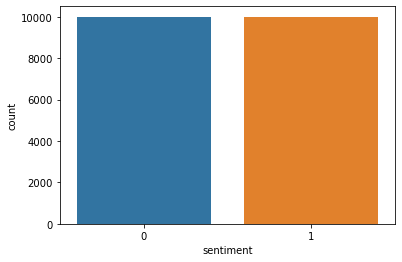

In [18]:
sns.countplot(data["sentiment"]) # the classes are equally distributed

In [19]:
data.dtypes

sentiment     int64
tweet        object
dtype: object

## Text Preprocessing

In [20]:
# Now, the next step is text preprocessing. 
# expanding the column width
pd.set_option('display.max_colwidth',-1)
data.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [21]:
# We can see that we have some punctuations,stopwords,urls, hashtags, mentions
data.tail()

,sentiment,tweet
19995,1,Just woke up. Having no school is the best feeling ever
19996,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
19997,1,Are you ready for your MoJo Makeover? Ask me for details
19998,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
19999,1,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [22]:
#! pip install tweet-preprocessor

In [23]:
data['clean_tweet'] = data.apply(preprocess_tweet, axis=1)
data[:10]

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it."
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball. Managed to save % The rest go out of bounds
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew,not the whole crew
6,0,Need a hug,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?","hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it,nope they didn't have it
9,0,@twittera que me muera ?,que me muera ?


In [24]:
str="- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it."
test1 = str.lower()
test1

"- awww, that's a bummer. you shoulda got david carr of third day to do it."

In [25]:
data["clean_tweet"]=data["clean_tweet"].apply(lowercase)
data["clean_tweet"]

0        - awww, that's a bummer. you shoulda got david carr of third day to do it.                                    
1        is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!
2        i dived many times for the ball. managed to save % the rest go out of bounds                                  
3        my whole body feels itchy and like its on fire                                                                
4        no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.                 
                                                     ...                                                               
19995    just woke up. having no school is the best feeling ever                                                       
19996    thewdb.com - very cool to hear old walt interviews!                                                           
19997    are you ready for your mojo mak

In [26]:
#!pip install contractions

In [27]:
 # Checking how contractions work
example = "that's a bummer.  he can't update. i'm okay. He'd do that. Trump's car"
example = contractions.fix(example)
example

"that is a bummer.  he cannot update. i am okay. He would do that. Trump's car"

In [28]:
data["clean_tweet"]=data["clean_tweet"].apply(expand_contractions)
data["clean_tweet"]

0        - awww, that is a bummer. you shoulda got david carr of third day to do it.                                    
1        is upset that he cannot update his facebook by texting it... and might cry as a result school today also. blah!
2        i dived many times for the ball. managed to save % the rest go out of bounds                                   
3        my whole body feels itchy and like its on fire                                                                 
4        no, it is not behaving at all. i am mad. why am i here? because i cannot see you all over there.               
                                                       ...                                                              
19995    just woke up. having no school is the best feeling ever                                                        
19996    thewdb.com - very cool to hear old walt interviews!                                                            
19997    are you ready for your 

In [29]:
# We will remove punctuations using string package

# Apply to the DF series
data['clean_tweet'] = data['clean_tweet'].apply(remove_punctuations)
data['clean_tweet']    

0         awww that is a bummer you shoulda got david carr of third day to do it                                   
1        is upset that he cannot update his facebook by texting it and might cry as a result school today also blah
2        i dived many times for the ball managed to save  the rest go out of bounds                                
3        my whole body feels itchy and like its on fire                                                            
4        no it is not behaving at all i am mad why am i here because i cannot see you all over there               
                                                    ...                                                            
19995    just woke up having no school is the best feeling ever                                                    
19996    thewdbcom  very cool to hear old walt interviews                                                          
19997    are you ready for your mojo makeover ask me for details        

In [30]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_digits)
data['clean_tweet']    

0         awww that is a bummer you shoulda got david carr of third day to do it                                   
1        is upset that he cannot update his facebook by texting it and might cry as a result school today also blah
2        i dived many times for the ball managed to save  the rest go out of bounds                                
3        my whole body feels itchy and like its on fire                                                            
4        no it is not behaving at all i am mad why am i here because i cannot see you all over there               
                                                    ...                                                            
19995    just woke up having no school is the best feeling ever                                                    
19996    thewdbcom  very cool to hear old walt interviews                                                          
19997    are you ready for your mojo makeover ask me for details        

In [31]:
# Checking if numbers are removed
data.iloc[39]

sentiment      0                                                                                                                
tweet          Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then class 6-10. Another day that's gonna fly by. I miss my girlfriend 
clean_tweet    bed class  work  gym  or  then class  another day that is going to fly by i miss my girlfriend                   
Name: 39, dtype: object

In [32]:
#nltk.download('punkt')

In [33]:
# testing how tokenizer works

stop_words = set(stopwords.words('english'))
example = "awww that is a bummer you shoulda got david carr of third day to do it "
example2 = stopwords_removal(example)
example2

'awww bummer shoulda got david carr third day'

In [34]:
data["clean_tweet"]=data["clean_tweet"].apply(stopwords_removal)
data["clean_tweet"]

0        awww bummer shoulda got david carr third day                                
1        upset cannot update facebook texting might cry result school today also blah
2        dived many times ball managed save rest go bounds                           
3        whole body feels itchy like fire                                            
4        behaving mad cannot see                                                     
                  ...                                                                
19995    woke school best feeling ever                                               
19996    thewdbcom cool hear old walt interviews                                     
19997    ready mojo makeover ask details                                             
19998    happy th birthday boo alll time tupac amaru shakur                          
19999    happy                                                                       
Name: clean_tweet, Length: 20000, dtype: object

In [35]:
# Dividing data into features and target variable
X= data["clean_tweet"]
y= data["sentiment"]

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=43)

## Text Vectorization - Keras Tokenizer

In [37]:
xtrain

18822    looking forward lunch broncos sweetheart                                                
17415    waiting omnia ii                                                                        
12240    going pick cousins school today beyond excited                                          
5588     bus school boo making biology test today                                                
12022    yea knows may next get bailout know ask live make                                       
                               ...                                                               
18448    glad got hang learned danger tweeting peoples names without space context startin rumors
7985     ok official feel like crap know allergies cold hate feeling phlem back throat           
18687    interesting mean us dirty something hehehehe                                            
19776    betcha                                                                                  
14148    giving calv

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xtrain) 
word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Found %s unique tokens.' % vocab_size)

Found 17449 unique tokens.


In [39]:
train_sequence = tokenizer.texts_to_sequences(xtrain)
testing_sequence = tokenizer.texts_to_sequences(xtest)

In [40]:
# finding the maximum length of reviews
review_lengths = []
for i in X:
    for word in i.split():
        
max_length = max(review_lengths)
max_length

132

In [41]:
# So, the longest review is 132 characters in length. We will set maxlength for padding to be 132
padded_xtrain = pad_sequences(train_sequence, maxlen=max_length) 
padded_xtest= pad_sequences(testing_sequence, maxlen=max_length) 


In [42]:
padded_xtrain[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  101,  220,  221, 4186, 2564],
      dtype=int32)

In [43]:
padded_xtrain.shape


(14000, 132)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(100, activation='relu', input_dim=max_length))
mlp.add(Dense(1,activation='sigmoid'))
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [45]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               13300     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________


In [46]:
mlp.fit(padded_xtrain,ytrain,epochs=50,validation_data=(padded_xtest, ytest ))

Epoch 1/50
438/438 [==============================] - 1s 1ms/step - loss: 40.3932 - accuracy: 0.4998 - val_loss: 14.1851 - val_accuracy: 0.4878
Epoch 2/50
438/438 [==============================] - 1s 1ms/step - loss: 24.6351 - accuracy: 0.5077 - val_loss: 11.5582 - val_accuracy: 0.5037
Epoch 3/50
438/438 [==============================] - 1s 1ms/step - loss: 21.1585 - accuracy: 0.5116 - val_loss: 9.6036 - val_accuracy: 0.4992
Epoch 4/50
438/438 [==============================] - 1s 1ms/step - loss: 18.0661 - accuracy: 0.5112 - val_loss: 9.7920 - val_accuracy: 0.4957
Epoch 5/50
438/438 [==============================] - 1s 1ms/step - loss: 15.8948 - accuracy: 0.5181 - val_loss: 8.4775 - val_accuracy: 0.4983
Epoch 6/50
438/438 [==============================] - 1s 1ms/step - loss: 14.5860 - accuracy: 0.5184 - val_loss: 8.8643 - val_accuracy: 0.5118
Epoch 7/50
438/438 [==============================] - 1s 1ms/step - loss: 13.0247 - accuracy: 0.5133 - val_loss: 7.8739 - val_accuracy: 0.48

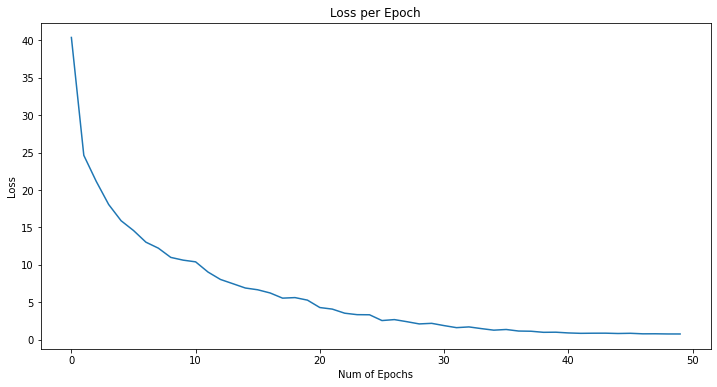

In [47]:
# we can plot loss per epoch too
loss_per_epoch = mlp.history.history['loss']
fig = plt.figure(1, figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.show()


In [48]:
mlp.evaluate(padded_xtest,ytest)

188/188 [==============================] - 0s 632us/step - loss: 0.7273 - accuracy: 0.4960


[0.7272889614105225, 0.4959999918937683]

In [69]:
model_Evaluate(mlp)

Accuracy is 0.496
F1 Score is 0.4473684210526316
              precision    recall  f1-score   support

           0       0.49      0.59      0.54      2984
           1       0.50      0.41      0.45      3016

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.50      0.50      0.49      6000

[[1752 1232]
 [1792 1224]]


## LSTM Model

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
lstm_model = Sequential()
lstm_model.add(Embedding((vocab_size+1),100,input_length=max_length))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(20, activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 132, 100)          1745000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,776,241
Trainable params: 1,776,241
Non-trainable params: 0
_________________________________________________________________


In [52]:
lstm_model.fit(padded_xtrain,ytrain,epochs=10,validation_data=(padded_xtest, ytest))

Epoch 1/10
438/438 [==============================] - 24s 55ms/step - loss: 23260604.0000 - accuracy: 0.6721 - val_loss: 0.5427 - val_accuracy: 0.7327
Epoch 2/10
438/438 [==============================] - 25s 57ms/step - loss: 0.3990 - accuracy: 0.8296 - val_loss: 0.5703 - val_accuracy: 0.7240
Epoch 3/10
438/438 [==============================] - 23s 53ms/step - loss: 0.2592 - accuracy: 0.8944 - val_loss: 0.7110 - val_accuracy: 0.7178
Epoch 4/10
438/438 [==============================] - 24s 56ms/step - loss: 0.1804 - accuracy: 0.9270 - val_loss: 0.8218 - val_accuracy: 0.7115
Epoch 5/10
438/438 [==============================] - 23s 53ms/step - loss: 0.1257 - accuracy: 0.9484 - val_loss: 1.0633 - val_accuracy: 0.7063
Epoch 6/10
438/438 [==============================] - 22s 51ms/step - loss: 0.0971 - accuracy: 0.9596 - val_loss: 1.2728 - val_accuracy: 0.7053
Epoch 7/10
438/438 [==============================] - 23s 53ms/step - loss: 0.0762 - accuracy: 0.9693 - val_loss: 1.6650 - val_ac

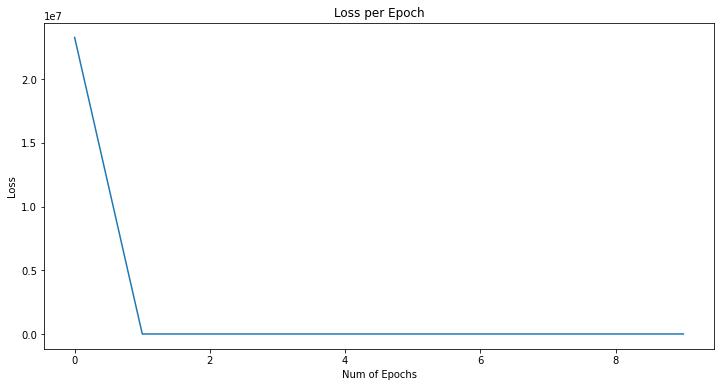

In [53]:
# we can plot loss per epoch too
loss_per_epoch = lstm_model.history.history['loss']
fig = plt.figure(1, figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.show()

In [70]:
model_Evaluate(lstm_model) 


Accuracy is 0.6926666666666667
F1 Score is 0.6895622895622896
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2984
           1       0.70      0.68      0.69      3016

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000

[[2108  876]
 [ 968 2048]]


In [62]:
lstm_model.evaluate(padded_xtest,ytest)

188/188 [==============================] - 2s 9ms/step - loss: 2.1121 - accuracy: 0.6927


[2.112123727798462, 0.6926666498184204]

In [71]:
from keras.layers import Bidirectional
Bilstm_model = Sequential()
Bilstm_model.add(Embedding((vocab_size+1),100,input_length=max_length))
Bilstm_model.add(Bidirectional(LSTM(50, activation='relu')))
Bilstm_model.add(Dense(20, activation='relu'))
Bilstm_model.add(Dense(1,activation='sigmoid'))
Bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
Bilstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 132, 100)          1745000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 1,807,441
Trainable params: 1,807,441
Non-trainable params: 0
_________________________________________________________________


In [73]:
Bilstm_model.fit(padded_xtrain,ytrain,epochs=10,validation_data=(padded_xtest, ytest))

Epoch 1/10
438/438 [==============================] - 35s 80ms/step - loss: 5184.4375 - accuracy: 0.6830 - val_loss: 0.5344 - val_accuracy: 0.7318
Epoch 2/10
438/438 [==============================] - 35s 79ms/step - loss: 0.3860 - accuracy: 0.8362 - val_loss: 0.5805 - val_accuracy: 0.7245
Epoch 3/10
438/438 [==============================] - 34s 77ms/step - loss: 0.3122 - accuracy: 0.8961 - val_loss: 0.7029 - val_accuracy: 0.7210
Epoch 4/10
438/438 [==============================] - 33s 76ms/step - loss: 67996624.0000 - accuracy: 0.9221 - val_loss: 0.7946 - val_accuracy: 0.7050
Epoch 5/10
438/438 [==============================] - 32s 73ms/step - loss: 0.1408 - accuracy: 0.9444 - val_loss: 1.0403 - val_accuracy: 0.7025
Epoch 6/10
438/438 [==============================] - 33s 74ms/step - loss: 0.1132 - accuracy: 0.9550 - val_loss: 1.2441 - val_accuracy: 0.6990
Epoch 7/10
438/438 [==============================] - 32s 73ms/step - loss: 0.0937 - accuracy: 0.9627 - val_loss: 1.2793 - val

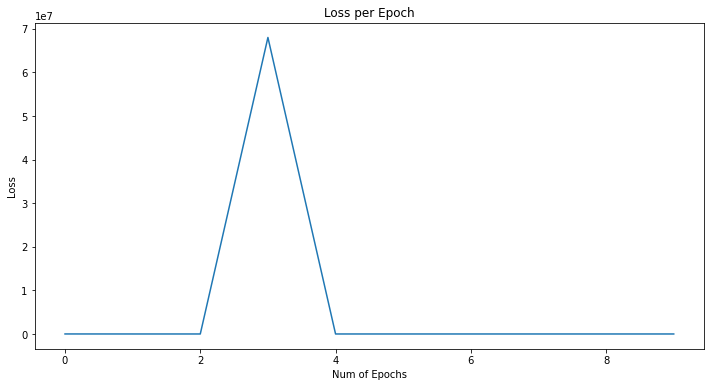

In [74]:
# we can plot loss per epoch too
loss_per_epoch = Bilstm_model.history.history['loss']
fig = plt.figure(1, figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.show()

In [75]:
Bilstm_model.evaluate(padded_xtest,ytest)

188/188 [==============================] - 2s 11ms/step - loss: 1.8611 - accuracy: 0.6840


[1.8611154556274414, 0.6840000152587891]

In [76]:
model_Evaluate(Bilstm_model)

Accuracy is 0.684
F1 Score is 0.6824120603015075
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      2984
           1       0.69      0.68      0.68      3016

    accuracy                           0.68      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.68      0.68      0.68      6000

[[2067  917]
 [ 979 2037]]
